In [1]:
import sys
sys.path.append('../')
import numpy as np
import torch

from torchqc.states import QuantumState
from torchqc.common_functions import get_density_matrix, expect_val_dm
from torchqc.operators import Operator
from torchqc.common_matrices import sigmaY
from torchqc.dynamics import TDSE, lindblad_equation, TDSE_numeric

* Start from basis state $\ket{0}$

In [2]:
n = 2
basis_states = QuantumState.basis(n)
state = basis_states[0] + 2. * basis_states[1]
state.normalize()

QuantumState (dims = 2 , tensor: tensor([[0.4472+0.j],
        [0.8944+0.j]], dtype=torch.complex128))

* Simulate dynamics with TDSE

In [3]:
T = 10
Dt = 0.01
time = np.arange(0, T + Dt, Dt, dtype = np.float32)

matrices = torch.from_numpy(np.array([np.array([[0, 1], [1, 0]], dtype=np.complex128) for _ in time]))
hamiltonian = Operator(2, matrices)

states = TDSE(state, hamiltonian, time, Dt)

* Print Rabi oscillations

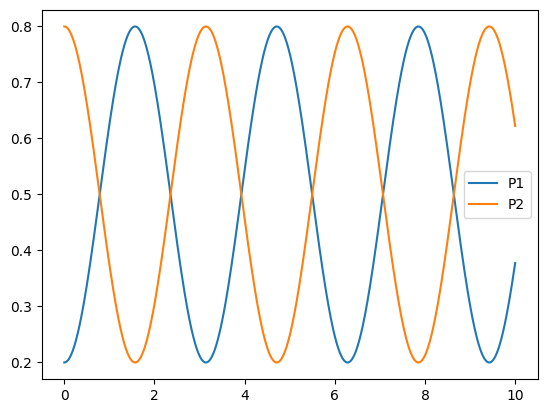

In [4]:
import matplotlib.pyplot as plt
populations = np.array([(torch.abs(state.state_tensor)**2).numpy() for state in states])

fig, ax = plt.subplots()

ax.plot(time, populations[:,0], label = "P1")
ax.plot(time, populations[:,1], label = "P2")

ax.legend()

* Numeric solution of TDSE

In [5]:
states = TDSE_numeric(state, hamiltonian, time, Dt)

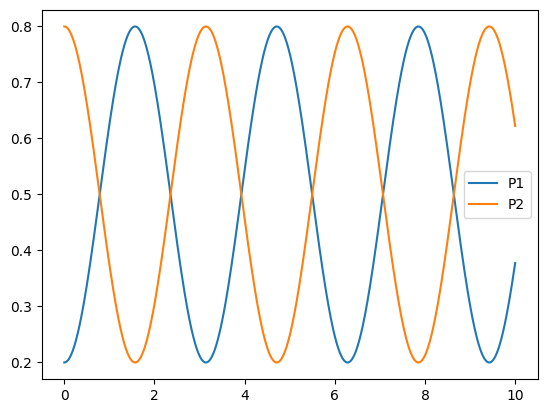

In [6]:
populations = np.array([(torch.abs(state.state_tensor)**2).numpy() for state in states])

fig, ax = plt.subplots()

ax.plot(time, populations[:,0], label = "P1")
ax.plot(time, populations[:,1], label = "P2")

ax.legend()

* Simulate dynamics with von-Neumann equations

In [7]:
rho = get_density_matrix(state)
_, states = lindblad_equation(rho, hamiltonian, time, Dt)
P1 = np.array([torch.real(state.matrix[0][0]) for state in states])
P2 = np.array([torch.real(state.matrix[1][1]) for state in states])

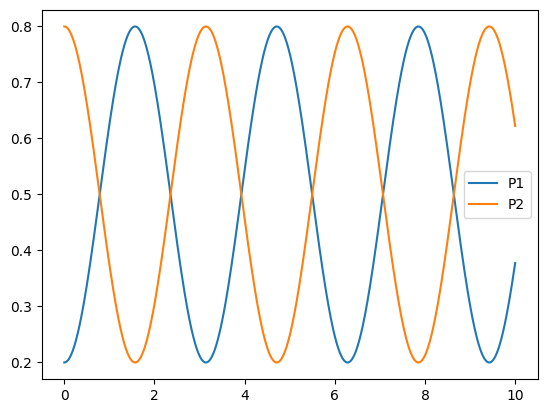

In [8]:
fig, ax = plt.subplots()

ax.plot(time, P1, label = "P1")
ax.plot(time, P2, label = "P2")
ax.legend()

In [9]:
expect_Z_list = expect_val_dm(states, sigmaY())
expect_Z = np.array(expect_Z_list)

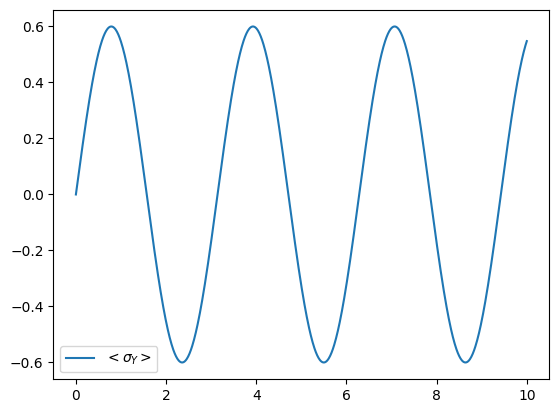

In [10]:
fig, ax = plt.subplots()

ax.plot(time, expect_Z, label = r"$<\sigma_Y>$")
ax.legend()